## Pré-processamento

In [2]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

In [3]:
# Carregando os datasets
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [4]:
# A primeira coluna é o rótulo (classe da roupa)
y_train = train['label'].values
y_test = test['label'].values
X_train = train.drop('label', axis=1).values
X_test = test.drop('label', axis=1).values

In [5]:
# Normalização: converte para float e escala entre 0 e 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
# Redimensiona para o formato de imagem
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
# Definindo rótulos das classes
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Função para plotar histórico de treino
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Treino')
    plt.plot(history.history['val_accuracy'], label='Validação')
    plt.title(f'Acurácia - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Treino')
    plt.plot(history.history['val_loss'], label='Validação')
    plt.title(f'Perda - {title}')
    plt.xlabel('Épocas')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

## Modelos

In [9]:
# Modelo 1 - CNN Simples
model1 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

print("\nTreinando Modelo 1 (CNN Simples)...")
history1 = model1.fit(X_train, y_train, epochs=10, batch_size=128,
                      validation_split=0.1, verbose=2)

c:\Users\gustb\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Treinando Modelo 1 (CNN Simples)...
Epoch 1/10
422/422 - 9s - 20ms/step - accuracy: 0.7949 - loss: 0.5644 - val_accuracy: 0.8598 - val_loss: 0.4018
Epoch 2/10
422/422 - 7s - 15ms/step - accuracy: 0.8708 - loss: 0.3624 - val_accuracy: 0.8725 - val_loss: 0.3545
Epoch 3/10
422/422 - 7s - 16ms/step - accuracy: 0.8844 - loss: 0.3213 - val_accuracy: 0.8885 - val_loss: 0.3141
Epoch 4/10
422/422 - 22s - 53ms/step - accuracy: 0.8960 - loss: 0.2880 - val_accuracy: 0.8925 - val_loss: 0.2925
Epoch 5/10
422/422 - 29s - 69ms/step - accuracy: 0.9035 - loss: 0.2634 - val_accuracy: 0.8860 - val_loss: 0.3070
Epoch 6/10
422/422 - 6s - 15ms/step - accuracy: 0.9119 - loss: 0.2414 - val_accuracy: 0.8983 - val_loss: 0.2798
Epoch 7/10
422/422 - 7s - 16ms/step - accuracy: 0.9166 - loss: 0.2268 - val_accuracy: 0.9030 - val_loss: 0.2708
Epoch 8/10
422/422 - 6s - 15ms/step - accuracy: 0.9234 - loss: 0.2092 - val_accuracy: 0.9010 - val_loss: 0.2673
Epoch 9/10
422/422 - 7s - 16ms/step - accuracy: 0.9291 - loss: 0.

In [10]:
# Modelo 2 - CNN Mais Profunda com Dropout
model2 = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

print("\nTreinando Modelo 2 (CNN Profunda)...")
history2 = model2.fit(X_train, y_train, epochs=10, batch_size=128,
                      validation_split=0.1, verbose=2)


Treinando Modelo 2 (CNN Profunda)...
Epoch 1/10
422/422 - 25s - 60ms/step - accuracy: 0.7827 - loss: 0.5895 - val_accuracy: 0.8677 - val_loss: 0.3655
Epoch 2/10
422/422 - 23s - 55ms/step - accuracy: 0.8686 - loss: 0.3645 - val_accuracy: 0.8937 - val_loss: 0.2988
Epoch 3/10
422/422 - 25s - 59ms/step - accuracy: 0.8871 - loss: 0.3118 - val_accuracy: 0.9077 - val_loss: 0.2614
Epoch 4/10
422/422 - 24s - 57ms/step - accuracy: 0.9003 - loss: 0.2768 - val_accuracy: 0.9057 - val_loss: 0.2571
Epoch 5/10
422/422 - 43s - 102ms/step - accuracy: 0.9066 - loss: 0.2593 - val_accuracy: 0.9173 - val_loss: 0.2272
Epoch 6/10
422/422 - 24s - 58ms/step - accuracy: 0.9134 - loss: 0.2400 - val_accuracy: 0.9193 - val_loss: 0.2263
Epoch 7/10
422/422 - 41s - 96ms/step - accuracy: 0.9190 - loss: 0.2223 - val_accuracy: 0.9217 - val_loss: 0.2190
Epoch 8/10
422/422 - 24s - 56ms/step - accuracy: 0.9229 - loss: 0.2101 - val_accuracy: 0.9257 - val_loss: 0.2059
Epoch 9/10
422/422 - 23s - 55ms/step - accuracy: 0.9251 -

## Resultados

In [11]:
# Avaliação no conjunto de teste
test_loss1, test_acc1 = model1.evaluate(X_test, y_test, verbose=0)
test_loss2, test_acc2 = model2.evaluate(X_test, y_test, verbose=0)

print("\n================== RESULTADOS ==================")
print(f"Modelo 1 - CNN Simples:  Acurácia de teste = {test_acc1:.4f}")
print(f"Modelo 2 - CNN Profunda: Acurácia de teste = {test_acc2:.4f}")
print("=================================================")


================== RESULTADOS ==================
Modelo 1 - CNN Simples:  Acurácia de teste = 0.9075
Modelo 2 - CNN Profunda: Acurácia de teste = 0.9274


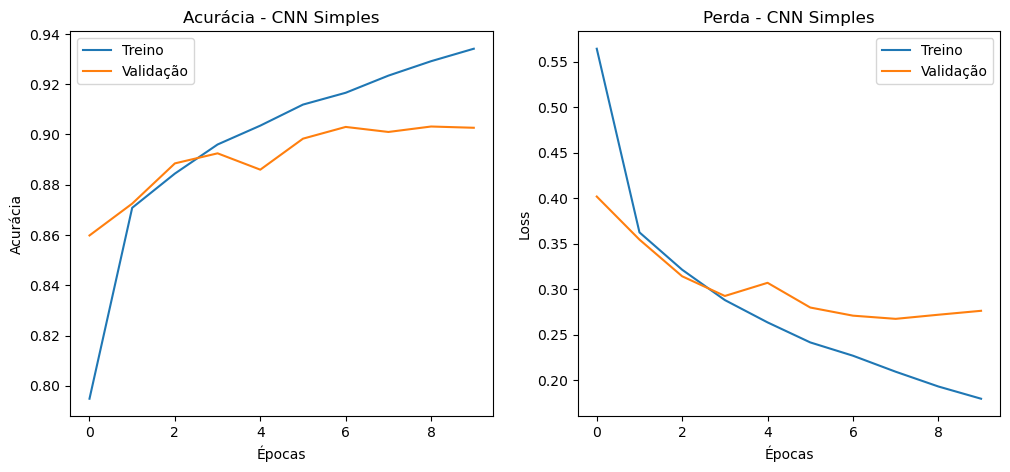

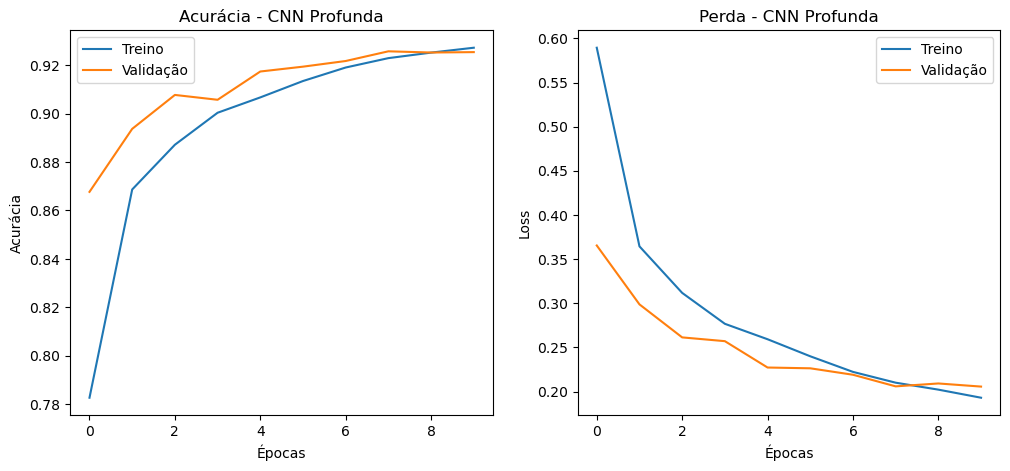

In [12]:
# Gráficos de comparação
plot_history(history1, "CNN Simples")
plot_history(history2, "CNN Profunda")